# Sampling period and rate
```{eval-rst}
.. index:: ! sampling, ! sampling period
```
The basic scheme for digitizing an analog signal is to measure the signal $x(t)$ at a sequence of uniformly spaced time points.
The **sampling period** is denoted by $t_s$, which must be a positive number, measuring the number of seconds between samples.
(Fractional values are allowed.)
The resulting sequence of samples will be 

$$
x(0), x(0 + t_s), x(0 + t_s + t_s), \dots
$$

More generally, the $n^\text{th}$ sample (for an arbitrary integer $n = 0, 1, 2, \dots$) represents the signal at time $n\cdot t_s$.
In a slight abuse of notation, we use square brackets with index $n$ to indicate discrete signals $x[n]$, and parentheses with time $t$ to denote continuous signals:

```{math}
:label: sampling-period

x[n] = x(n \cdot t_s).
```

By convention, we use $N$ to denote the total number of samples.

In [1]:
%run ../setup.ipynb

<Figure size 432x172.8 with 1 Axes>

<Figure size 432x172.8 with 1 Axes>

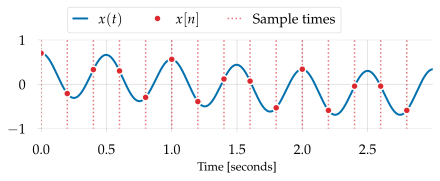

In [2]:
fs = 1000
duration = 3
t = np.linspace(0, duration, num=duration * fs, endpoint=False)

x = 0.5 * np.cos(2 * np.pi * 2 * t) + 0.2 * np.cos(2 * np.pi * 0.2 * t)

ts = 200

fig, ax = plt.subplots(figsize=figaspect(2./5))

ax.plot(t, x, label=r'$x(t)$')
ax.plot(t[::ts], x[::ts], linestyle='', marker='o', label=r'$x[n]$')
ax.vlines(t[::ts], -2, 2, color=colors[1], alpha=0.65, linestyle=':', zorder=-3, linewidth=1.5, label='Sample times')
ax.legend(bbox_to_anchor=(0.05, 1), ncol=3)
ax.set(xlabel='Time [seconds]', ylim=[-1, 1]);
glue('sampling', fig, display=False)

```{glue:figure} sampling
:alt: a continuous signal being sampled at uniformly spaced intervals

A continuous signal (solid curve) sampled at t_s=0.2 [seconds / sample] (dots).
```

Oftentimes, it is more convenient to work with the **sampling rate**, which we denote as

$$
f_s = \frac{1}{t_s} \quad \left[\frac{\text{samples}}{\text{second}}\right].
$$

Note that the sampling rate can always be converted to a sampling period (and vice versa) by taking reciprocals,
resulting in the following (equivalent) form for discretely sampled signals:

```{math}
:label: sampling

x[n] = x\left(\frac{n}{f_s}\right).
```

## Discrete signals and visualization

A signal $x[n]$ which has been sampled is said to be a *discrete-time* signal (or sometimes, just *discrete signal*), to distinguish it from *continuous-time* signals $x(t)$.

Properly speaking, we do not have sample values at non-integer indices (e.g., $x[n+1/2]$), but it is often helpful for understanding to connect sample values in visualizations.
When visualizing discrete-time signals, we adopt the convention of using *step-plots* rather than continuously varying curves (like $x(t)$ in the figure above), to emphasize the fact that the signal has been discretized.
Step plots, as demonstrated below, preserve the sample value $x[n]$ up to the next sample position $x[n+1]$.

<Figure size 432x324 with 3 Axes>

<Figure size 432x324 with 3 Axes>

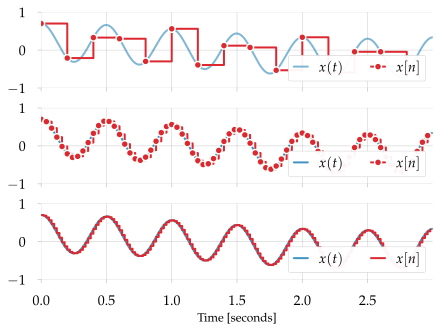

In [6]:
fig, (ax, ax1, ax2) = plt.subplots(nrows=3, figsize=figaspect(0.75), sharex=True, sharey=True)

ax.plot(t, x, label=r'$x(t)$', alpha=0.5)
ax.step(t[::ts], x[::ts], label=r'$x[n]$', where='post', marker='o')

ax.legend(loc='lower right', ncol=2)
ax.label_outer()

ax1.plot(t, x, label=r'$x(t)$', alpha=0.75)
ax1.step(t[::ts//5], x[::ts//5], label=r'$x[n]$', where='post', marker='o')

ax1.legend(loc='lower right', ncol=2)
ax1.label_outer()

ax2.plot(t, x, label=r'$x(t)$', alpha=0.75)
ax2.step(t[::ts//10], x[::ts//10], label=r'$x[n]$', where='post')

ax2.legend(loc='lower right', ncol=2)
ax2.label_outer()


ax2.set(xlabel='Time [seconds]', ylim=[-1, 1])


glue('steps', fig, display=False)

```{glue:figure} steps
:alt: A continuous signal sampled at different sampling rates.

A continuous signal $x(t)$ and the discrete signal $x[n]$ obtained by sampling at 5 Hz (top), 25 Hz (middle), and 50 Hz (bottom).
The discrete-time signal is illustrated as a step plot.
At sufficiently high sampling rates, the continuous and discrete signals appear visually similar.
```

For most practical applications, we tend to have sampling rates that are sufficiently high to guarantee that a step plot and a continuous plot look visually identical.
However, throughout this text, we will often use examples generated at low sampling rates because they are easier to understand.

## Tone generation

We now have everything that we need to start making sounds.  In this example, we'll generate a pure tone at 220 Hz.

Recall from the previous chapter that a wave at frequency $f_0$ is expressed as a function of time $t$ by

```{math}
x(t) = \cos\left(2\pi \cdot f_0 \cdot t\right).
```

(Here, we'll ignore amplitude and phase to keep things simple.)

Even if we don't have an existing signal to sample, we can still sample from this idealized signal by substituting $t = n / f_s$ and computing the cosine values directly:

```{math}
x[n] = \cos\left(2\pi \cdot f_0 \cdot \frac{n}{f_s}\right),
```

or, in code:
```python
for n in range(N):  # n goes from 0, 1, 2, ..., N-1
    x[n] = np.cos(2 * np.pi * f_0 * n / f_s)
```

### Vectorization
```{eval-rst}
.. index:: vectorization
```
In practice, generating a tone in this fashion would be rather slow -- at least, when using the Python programming language.
Instead, a much faster way to do it is to pre-allocate all the values of `n` as a *vector* 
```
n = [0, 1, 2, ..., N-1].
```

````{margin}
```{note}
For our purposes, the word *vector* just means a list or array of numbers.
```
````

In code, you can do this by using the `np.arange` function, like so:
```python
n = np.arange(N)  # n is now an array containing values [0, 1, 2, ..., N-1]
x = np.cos(2 * np.pi * f_0 * n / f_s)
```
The result will be an array `x` with `N` total samples.
Python (`numpy`) is smart enough to know that when you multiply, add, and call cosine on lists of numbers, it should apply these operations to each element of the list.
This process is called *vectorization*, and it's quite common in numerical computing.
It might look a little strange and take some getting used to, but it does simplify and accelerate many of the types of operations we do in signal processing code.

In [4]:
# We use numpy for numeric computation
import numpy as np

# The Audio object allows us to play back sound in Jupyter
from IPython.display import Audio

# We'll use an 8 KHz sampling rate, roughly
# equivalent to telephone quality
fs = 8000

# And generate 1.5 seconds of audio
duration = 1.5

# Total number of samples
# we round it down to a whole number by int(...)
N = int(duration * fs)

# Generate a pure tone at 220 Hz
f0 = 220

# Make an array of sample indices
n = np.arange(N)

# And make the tone, using (n / fs) in place of t
x = np.cos(2 * np.pi * f0 * n / fs)

# How does it sound?
Audio(data=x, rate=fs)

<source src="data:audio/wav;base64,UklGRuRdAABXQVZFZm10IBAAAAABAAEAQB8AAIA+AAACABAAZGF0YcBdAAD/fxd+bXgub59iIFMnQT4t+xcCAvvri9ZXwvmv/p/ekv+IqoISgEiBRYbijt2a3KlruwXPFeT5+QoQoiUbOtlMTl36anh1dXy+fzl/6Xrxco1nElnxR6w01B8KCvXzOt6ByWe2f6VIlzCMi4STgGeAB4RZiySWFqTFtLHHS9z18QkI4R3VMkVGnldbZgtyVnr8ftp/6XxAdhJsq15zTuQ7jScIEvv7DObi0CC9W6scnNeP6IaVgQaARoJFiNWRrJ5qrpbApdT/6QAAARZbK2o/llFUYStuu3e6ffp/a34YeSlw5GOlVOBCHi/0GQUE+O1z2BzEjbFVoe6TwIkXgyaABIGqhfWNpZliqLu5K80f4vf3Cw61I084O0vqW9xpp3T5e5l/bX91e9BzuGiBWplJfzbGIQsM9vUs4FTLD7jupnOYD40XhceAQoCLg4iKBpWyoiez5cVe2vbvBwbrG/swlUQkViNlHnG7ebh+7n9WfQF3Im0CYAdQqT11KQUU/v0F6MLS2b7grGGd0pCTh+mBAYDpgZOH0pBhneCs2b7C0gXo/v0FFHUpqT0HUAJgIm0Bd1Z97n+4frt5HnEjZSRWlUT7MOsbBwb2717a5cUns7KiBpWIiouDQoDHgBeFD41zmO6mD7hUyyzg9vULDMYhfzaZSYFauGjQc3V7bX+Zf/l7p3TcaepbO0tPOLUjCw739x/iK827uWKopZn1jaqFBIEmgBeDwInuk1WhjbEcxHPY+O0FBPQZHi/gQqVU5GMpcBh5a376f7p9u3crblRhllFqP1srARYAAP/ppdSWwGqurJ7VkUWIRoIGgJWB6IbXjxycW6sgveLQDOb7+wgSjSfkO3NOq14SbEB26Xzaf/x+VnoLcltmnldFRtUy4R0JCPXxS9yxx8W0FqQkllmLB4RngJOAi4QwjEiXf6VntoHJOt718woK1B+sNPFHElmNZ/Fy6Xo5f75/dXx4dfpqTl3ZTBs6oiUKEPn5FeQFz2u73KndmuKORYZIgRKAqoL/iN6S/p/5r1fCi9b76wIC+xc+LSdBIFOfYi5vbXgXfv9/F35teC5vn2IgUydBPi37FwIC++uL1lfC+a/+n96S/4iqghKASIFFhuKO3ZrcqWu7Bc8V5Pn5ChCiJRs62UxOXfpqeHV1fL5/OX/pevFyjWcSWfFHrDTUHwoK9fM63oHJZ7Z/pUiXMIyLhJOAZ4AHhFmLJJYWpMW0scdL3PXxCQjhHdUyRUaeV1tmC3JWevx+2n/pfEB2EmyrXnNO5DuNJwgS+/sM5uLQIL1bqxyc14/ohpWBBoBGgkWI1ZGsnmqulsCl1P/pAAABFlsraj+WUVRhK267d7p9+n9rfhh5KXDkY6VU4EIeL/QZBQT47XPYHMSNsVWh7pPAiReDJoAEgaqF9Y2lmWKou7krzR/i9/cLDrUjTzg7S+pb3GmndPl7mX9tf3V70HO4aIFamUl/NsYhCwz29SzgVMsPuO6mc5gPjReFx4BCgIuDiIoGlbKiJ7PlxV7a9u8HBusb+zCVRCRWI2Uecbt5uH7uf1Z9AXcibQJgB1CpPXUpBRT+/QXowtLZvuCsYZ3SkJOH6YEBgOmBk4fSkGGd4KzZvsLSBej+/QUUdSmpPQdQAmAibQF3Vn3uf7h+u3kecSNlJFaVRPsw6xsHBvbvXtrlxSezsqIGlYiKi4NCgMeAF4UPjXOY7qYPuFTLLOD29QsMxiF/NplJgVq4aNBzdXttf5l/+XundNxp6ls7S084tSMLDvf3H+Irzbu5YqilmfWNqoUEgSaAF4PAie6TVaGNsRzEc9j47QUE9BkeL+BCpVTkYylwGHlrfvp/un27dytuVGGWUWo/WysBFgAA/+ml1JbAaq6sntWRRYhGggaAlYHohtePHJxbqyC94tAM5vv7CBKNJ+Q7c06rXhJsQHbpfNp//H5WegtyW2aeV0VG1TLhHQkI9fFL3LHHxbQWpCSWWYsHhGeAk4CLhDCMSJd/pWe2gck63vXzCgrUH6w08UcSWY1n8XLpejl/vn91fHh1+mpOXdlMGzqiJQoQ+fkV5AXPa7vcqd2a4o5FhkiBEoCqgv+I3pL+n/mvV8KL1vvrAgL7Fz4tJ0EgU59iLm9teBd+/38Xfm14Lm+fYiBTJ0E+LfsXAgL764vWV8L5r/6f3pL/iKqCEoBIgUWG4o7dmtypa7sFzxXk+fkKEKIlGzrZTE5d+mp4dXV8vn85f+l68XKNZxJZ8UesNNQfCgr18zregclntn+lSJcwjIuEk4BngAeEWYsklhakxbSxx0vc9fEJCOEd1TJFRp5XW2YLclZ6/H7af+l8QHYSbKtec07kO40nCBL7+wzm4tAgvVurHJzXj+iGlYEGgEaCRYjVkayeaq6WwKXU/+kAAAEWWytqP5ZRVGErbrt3un36f2t+GHkpcORjpVTgQh4v9BkFBPjtc9gcxI2xVaHuk8CJF4MmgASBqoX1jaWZYqi7uSvNH+L39wsOtSNPODtL6lvcaad0+XuZf21/dXvQc7hogVqZSX82xiELDPb1LOBUyw+47qZzmA+NF4XHgEKAi4OIigaVsqIns+XFXtr27wcG6xv7MJVEJFYjZR5xu3m4fu5/Vn0BdyJtAmAHUKk9dSkFFP79BejC0tm+4KxhndKQk4fpgQGA6YGTh9KQYZ3grNm+wtIF6P79BRR1Kak9B1ACYCJtAXdWfe5/uH67eR5xI2UkVpVE+zDrGwcG9u9e2uXFJ7OyogaViIqLg0KAx4AXhQ+Nc5jupg+4VMss4Pb1CwzGIX82mUmBWrho0HN1e21/mX/5e6d03GnqWztLTzi1IwsO9/cf4ivNu7liqKWZ9Y2qhQSBJoAXg8CJ7pNVoY2xHMRz2PjtBQT0GR4v4EKlVORjKXAYeWt++n+6fbt3K25UYZZRaj9bKwEWAAD/6aXUlsBqrqye1ZFFiEaCBoCVgeiG148cnFurIL3i0Azm+/sIEo0n5DtzTqteEmxAdul82n/8flZ6C3JbZp5XRUbVMuEdCQj18UvcscfFtBakJJZZiweEZ4CTgIuEMIxIl3+lZ7aByTre9fMKCtQfrDTxRxJZjWfxcul6OX++f3V8eHX6ak5d2UwbOqIlChD5+RXkBc9ru9yp3ZrijkWGSIESgKqC/4jekv6f+a9XwovW++sCAvsXPi0nQSBTn2Iub214F37/fxd+bXgub59iIFMnQT4t+xcCAvvri9ZXwvmv/p/ekv+IqoISgEiBRYbijt2a3KlruwXPFeT5+QoQoiUbOtlMTl36anh1dXy+fzl/6Xrxco1nElnxR6w01B8KCvXzOt6ByWe2f6VIlzCMi4STgGeAB4RZiySWFqTFtLHHS9z18QkI4R3VMkVGnldbZgtyVnr8ftp/6XxAdhJsq15zTuQ7jScIEvv7DObi0CC9W6scnNeP6IaVgQaARoJFiNWRrJ5qrpbApdT/6QAAARZbK2o/llFUYStuu3e6ffp/a34YeSlw5GOlVOBCHi/0GQUE+O1z2BzEjbFVoe6TwIkXgyaABIGqhfWNpZliqLu5K80f4vf3Cw61I084O0vqW9xpp3T5e5l/bX91e9BzuGiBWplJfzbGIQsM9vUs4FTLD7jupnOYD40XhceAQoCLg4iKBpWyoiez5cVe2vbvBwbrG/swlUQkViNlHnG7ebh+7n9WfQF3Im0CYAdQqT11KQUU/v0F6MLS2b7grGGd0pCTh+mBAYDpgZOH0pBhneCs2b7C0gXo/v0FFHUpqT0HUAJgIm0Bd1Z97n+4frt5HnEjZSRWlUT7MOsbBwb2717a5cUns7KiBpWIiouDQoDHgBeFD41zmO6mD7hUyyzg9vULDMYhfzaZSYFauGjQc3V7bX+Zf/l7p3TcaepbO0tPOLUjCw739